# DATA - MID PROJECT REGRESSION

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [116]:
old = pd.read_csv("regression_data.csv")
old.head()

,7129300520,10/13/14,3,1,1180,5650,1.1,0,0.1,3.1,7,1180.1,0.2,1955,0.3,98178,47.5112,-122.257,1340,5650.1,221900
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


In [3]:
# 

In [4]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
reg.shape

(21597, 21)

In [6]:
reg["id"].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [7]:
reg = reg.drop_duplicates(subset=['id'])
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  int64  
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  int64  
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

In [8]:
tableau = reg.to_csv("reg.csv")

In [9]:
reg.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [10]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [11]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [12]:
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


In [13]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [14]:
reg = reg.drop(["date"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015,2,18


In [15]:
reg.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
count,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000
mean,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007610,0.235107,3.410784,7.662792,1791.170215,291.962418,1971.092997,84.793091,98077.87437,1988.384080,12775.718161,5.407393e+05,2014.318954,6.590336,15.682726
std,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.086903,0.767165,0.650035,1.171971,828.692965,442.875502,29.387141,402.574626,53.47748,685.537057,27345.621867,3.679311e+05,0.466082,3.107924,8.636590
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,399.000000,651.000000,7.800000e+04,2014.000000,1.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,1490.000000,5100.000000,3.225000e+05,2014.000000,4.000000,8.000000
50%,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,1840.000000,7620.000000,4.500000e+05,2014.000000,6.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,2370.000000,10086.250000,6.450000e+05,2015.000000,9.000000,23.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,6210.000000,871200.000000,7.700000e+06,2015.000000,12.000000,31.000000


In [16]:
# fazer bucketing 1, 2-3 , 4-5,  >= 6
reg["bedrooms"].value_counts()


3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [20]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13


In [21]:
reg["bathrooms"].value_counts()

2    10478
1     8252
3     2217
4      335
0       74
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [24]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

1300    136
1440    133
1400    132
1660    128
1800    128
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [25]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6


In [26]:
# sqft of the lot
reg["sqft_lot"].value_counts()

5000      355
6000      286
4000      249
7200      218
7500      118
         ... 
24330       1
215622      1
6022        1
2323        1
1076        1
Name: sqft_lot, Length: 9776, dtype: int64

In [27]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9


In [28]:
reg["floors"].value_counts()

1    12440
2     8364
3      616
Name: floors, dtype: int64

In [29]:
reg["waterfront"].value_counts()

0    21257
1      163
Name: waterfront, dtype: int64

In [30]:
# views 
reg["view"].value_counts()

0    19306
2      960
3      507
1      331
4      316
Name: view, dtype: int64

In [31]:
# bucket in viewed or not viewed

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [32]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0


In [33]:
reg["viewed_or_not"].value_counts()

0    19306
1     2114
Name: viewed_or_not, dtype: int64

In [34]:
reg["condition"].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [35]:
reg["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [36]:
reg["sqft_above"].value_counts()
#sqft apart from basement

1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [37]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6


In [38]:
reg["sqft_basement"].value_counts()
# sqftge basement

0      12999
600      220
700      215
500      211
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [39]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0


In [40]:
reg["yr_built"].value_counts()
# 0-30 , 30-60, 60-90 , > 90 , categorica ordinal!!

2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [41]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

9      559
17     453
18     450
19     429
20     420
      ... 
90      29
122     29
121     27
88      24
89      21
Name: age, Length: 116, dtype: int64

In [42]:
def group_year(val):
    if val in [0, 30]:
        return 0
    elif val in [31, 60]:
        return 1
    elif val in [61, 90]:
        return 2
    else:
        return 3

In [43]:
reg['age_group'] = reg['age'].apply(group_year)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,3


In [44]:
reg["yr_renovated"].value_counts()
# renovaçao sim/não

0       20510
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [45]:
# group - renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [46]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,3,0


In [47]:
reg["zipcode"].value_counts()
# ver os zipcodes - ricos  ---> ver mais a frente

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

In [48]:
reg["sqft_living15"].value_counts()
# Living room area in 2015(implies-- some renovations) 
# This might or might not have affected the lotsize area

1540    193
1440    190
1560    190
1500    178
1460    168
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [49]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5


In [50]:
reg["sqft_lot15"].value_counts()
# lotSize area in 2015(implies-- some renovations)

5000     425
4000     354
6000     285
7200     209
4800     144
        ... 
14484      1
1709       1
8721       1
12881      1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [51]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9


In [52]:
reg["price"].value_counts()

350000    172
450000    171
550000    156
500000    151
425000    150
         ... 
231200      1
580135      1
653450      1
826600      1
402101      1
Name: price, Length: 3607, dtype: int64

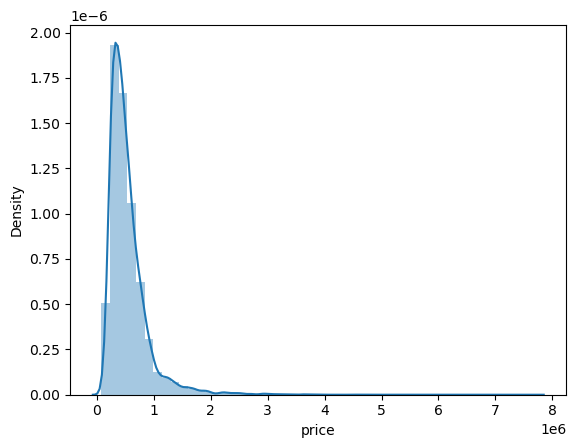

In [55]:
sns.distplot(reg["price"])
plt.show()

In [57]:
# houses sold in 2014 e 2015 --> only two , drop them
reg["year"].value_counts()

2014    14588
2015     6832
Name: year, dtype: int64

In [58]:
reg = reg.drop(["year"], axis=1)
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,9,238.8,672.8,0,201.6,37.2,72,3,1,157.0,709.7
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0


In [59]:
reg["month"].value_counts()
# Q1-4

5     2398
7     2211
4     2187
6     2178
8     1936
10    1870
3     1835
9     1770
12    1454
11    1401
2     1220
1      960
Name: month, dtype: int64

In [60]:
def quarter(val):
      if val >= 1 and val <= 3:
        return 1 
      if val >= 4  and val <=6:
        return 2    
      if val >= 7 and val <= 9:
        return 3
      else:
        return 4

In [61]:
reg["quarter"] = reg["month"].apply(quarter)
reg.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,4


In [62]:
reg["day"].value_counts()
# dividir em quinzenas

23    900
9     805
5     799
24    788
20    781
16    753
27    743
17    743
2     734
25    732
22    732
8     731
13    729
10    728
6     711
12    711
18    710
11    694
3     681
4     667
26    659
29    653
21    653
14    650
7     646
19    639
15    622
30    606
28    605
1     565
31    250
Name: day, dtype: int64

In [63]:
def quinzena(day):
     if day >= 1 and day <= 14:
        return 1 
     else:
        return 2

In [64]:
reg["fortnight"] = reg["day"].apply(quinzena)

In [65]:
reg["fortnight"].value_counts()

2    11569
1     9851
Name: fortnight, dtype: int64

In [66]:
reg.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,4,1
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,9,238.8,672.8,0,201.6,37.2,72,3,1,157.0,709.7,4,1
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0,1,2
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5,4,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0,1,2


In [67]:
reg_model = reg.copy()

In [68]:
reg_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,month,day,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,10,13,109.6,524.9,0,109.6,0.0,68,3,0,124.5,524.9,4,1
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,12,9,238.8,672.8,0,201.6,37.2,72,3,1,157.0,709.7,4,1
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2,25,71.5,929.0,0,71.5,0.0,90,2,0,252.7,749.0,1,2
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,12,9,182.1,464.5,0,97.5,84.5,58,3,0,126.3,464.5,4,1
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2,18,156.1,750.7,0,156.1,0.0,36,3,0,167.2,697.0,1,2


In [69]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'sqm2_living', 'sqm2_lot',
       'viewed_or_not', 'sqm2_above', 'sqm2_basement', 'age', 'age_group',
       'ren_or_not', 'sqm2_living15', 'sqm2_lot15', 'quarter', 'fortnight'],
      dtype='object')

In [71]:
reg_model = reg_model.drop(["view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15", "month", "day", "age"], axis = 1)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1
1,3,2,2,0,3,7,538000,238.8,672.8,0,201.6,37.2,3,1,157.0,709.7,4,1
2,2,1,1,0,3,6,180000,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2
3,4,3,1,0,5,7,604000,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1
4,3,2,1,0,3,8,510000,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2


In [72]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9
1,3,2,2,0,3,7,538000,238.8,672.8,0,201.6,37.2,3,1,157.0,709.7,4,1,-81.8
2,2,1,1,0,3,6,180000,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2
3,4,3,1,0,5,7,604000,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8
4,3,2,1,0,3,8,510000,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1


In [73]:
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [74]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1


In [75]:
reg_model["bigger_living_or_not"].value_counts()

0    12313
1     9107
Name: bigger_living_or_not, dtype: int64

In [76]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1,0.0
1,3,2,2,0,3,7,538000,238.8,672.8,0,201.6,37.2,3,1,157.0,709.7,4,1,-81.8,0,36.9
2,2,1,1,0,3,6,180000,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2,1,-180.0
3,4,3,1,0,5,7,604000,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8,0,0.0
4,3,2,1,0,3,8,510000,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1,1,-53.7


In [77]:
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [78]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,living_sqm15_init,bigger_living_or_not,lot_sqm15_init,bigger_lot_or_not
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,14.9,1,0.0,0
1,3,2,2,0,3,7,538000,238.8,672.8,0,201.6,37.2,3,1,157.0,709.7,4,1,-81.8,0,36.9,1
2,2,1,1,0,3,6,180000,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,181.2,1,-180.0,0
3,4,3,1,0,5,7,604000,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,-55.8,0,0.0,0
4,3,2,1,0,3,8,510000,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,11.1,1,-53.7,0


In [79]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'price', 'sqm2_living', 'sqm2_lot', 'viewed_or_not', 'sqm2_above',
       'sqm2_basement', 'age_group', 'ren_or_not', 'sqm2_living15',
       'sqm2_lot15', 'quarter', 'fortnight', 'living_sqm15_init',
       'bigger_living_or_not', 'lot_sqm15_init', 'bigger_lot_or_not'],
      dtype='object')

In [80]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,price,sqm2_living,sqm2_lot,viewed_or_not,sqm2_above,sqm2_basement,age_group,ren_or_not,sqm2_living15,sqm2_lot15,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,3,1,1,0,3,7,221900,109.6,524.9,0,109.6,0.0,3,0,124.5,524.9,4,1,1,0
1,3,2,2,0,3,7,538000,238.8,672.8,0,201.6,37.2,3,1,157.0,709.7,4,1,0,1
2,2,1,1,0,3,6,180000,71.5,929.0,0,71.5,0.0,2,0,252.7,749.0,1,2,1,0
3,4,3,1,0,5,7,604000,182.1,464.5,0,97.5,84.5,3,0,126.3,464.5,4,1,0,0
4,3,2,1,0,3,8,510000,156.1,750.7,0,156.1,0.0,3,0,167.2,697.0,1,2,1,0


In [81]:
target = reg_model["price"]

In [82]:
cat_model = reg_model[["floors", 'waterfront', 'condition', 'grade', 'viewed_or_not','age_group', 'ren_or_not', 
                       'quarter', 'fortnight',"bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

,floors,waterfront,condition,grade,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
0,1,0,3,7,0,3,0,4,1,1,0
1,2,0,3,7,0,3,1,4,1,0,1
2,1,0,3,6,0,2,0,1,2,1,0
3,1,0,5,7,0,3,0,4,1,0,0
4,1,0,3,8,0,3,0,1,2,1,0


In [84]:
num_model = reg_model[['sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
0,109.6,524.9,109.6,0.0,124.5,524.9
1,238.8,672.8,201.6,37.2,157.0,709.7
2,71.5,929.0,71.5,0.0,252.7,749.0
3,182.1,464.5,97.5,84.5,126.3,464.5
4,156.1,750.7,156.1,0.0,167.2,697.0


In [85]:
sns.pairplot(num_model)

In [86]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [87]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

,sqm2_living,sqm2_lot,sqm2_above,sqm2_basement,sqm2_living15,sqm2_lot15
sqm2_living,1.00,0.17,0.88,0.43,0.76,0.18
sqm2_lot,0.17,1.00,0.18,0.02,0.14,0.72
sqm2_above,0.88,0.18,1.00,-0.05,0.73,0.19
sqm2_basement,0.43,0.02,-0.05,1.00,0.20,0.02
sqm2_living15,0.76,0.14,0.73,0.20,1.00,0.18
sqm2_lot15,0.18,0.72,0.19,0.02,0.18,1.00


<Figure size 1000x1000 with 0 Axes>

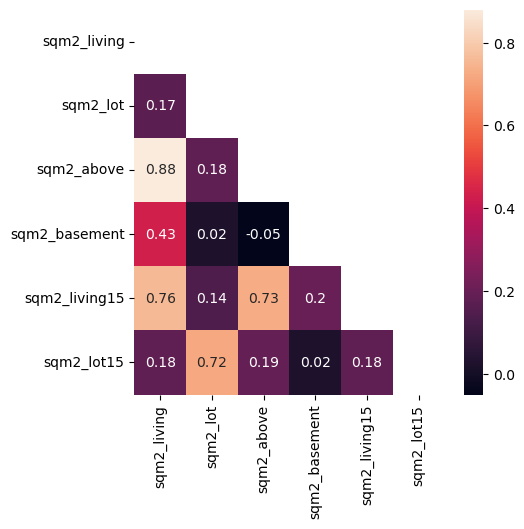

In [88]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [94]:
num_model = num_model.drop(["sqm2_above"], axis = 1)
num_model.head()

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
0,109.6,524.9,0.0,124.5,524.9
1,238.8,672.8,37.2,157.0,709.7
2,71.5,929.0,0.0,252.7,749.0
3,182.1,464.5,84.5,126.3,464.5
4,156.1,750.7,0.0,167.2,697.0


In [95]:
X = num_model

In [96]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(21420, 5)


In [97]:
X_norm = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)
X_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    21420 non-null  float64
 1   sqm2_lot       21420 non-null  float64
 2   sqm2_basement  21420 non-null  float64
 3   sqm2_living15  21420 non-null  float64
 4   sqm2_lot15     21420 non-null  float64
dtypes: float64(5)
memory usage: 1004.1 KB


In [98]:
X_norm.head()

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15
0,0.061463,0.003108,0.000000,0.161912,0.005742
1,0.167062,0.004072,0.083073,0.222119,0.008027
2,0.030323,0.005742,0.000000,0.399407,0.008513
3,0.120719,0.002714,0.188700,0.165246,0.004995
4,0.099469,0.004580,0.000000,0.241015,0.007870


In [102]:
model_conc = pd.concat([X_norm, cat_model], axis = 1)
model_conc.sample(50)

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15,floors,waterfront,condition,grade,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
18849,0.139681,0.003061,0.093345,0.234161,0.004665,1,0,3,7,1,3,0,2,1,0,0
10227,0.233102,0.004622,0.000000,0.371804,0.008804,2,0,3,10,0,3,0,4,2,0,1
17233,0.249040,0.023034,0.228227,0.423490,0.038634,2,0,3,9,0,3,0,3,1,0,0
5316,0.116878,0.005000,0.145154,0.311597,0.009335,1,0,3,7,0,3,0,1,1,1,1
10074,0.466204,0.009662,0.676418,0.702297,0.018172,2,0,4,11,1,3,0,3,1,0,0
14938,0.034164,0.174364,0.000000,0.203223,0.008618,1,0,3,6,0,3,1,4,1,1,0
9715,0.135922,0.004279,0.000000,0.303075,0.007720,2,0,3,8,0,3,0,3,1,0,0
5782,0.074377,0.002281,0.000000,0.179140,0.004811,1,0,3,8,0,3,0,3,2,1,1
19828,0.241438,0.005379,0.000000,0.542238,0.010073,2,0,3,9,0,3,0,3,2,0,1
14742,0.084266,0.003925,0.099598,0.184328,0.007319,1,0,3,7,0,3,0,3,1,0,1


In [103]:
X = model_conc
y = target

In [104]:
model_conc.isna().sum()

sqm2_living             0
sqm2_lot                0
sqm2_basement           0
sqm2_living15           0
sqm2_lot15              0
floors                  0
waterfront              0
condition               0
grade                   0
viewed_or_not           0
age_group               0
ren_or_not              0
quarter                 0
fortnight               0
bigger_living_or_not    0
bigger_lot_or_not       0
dtype: int64

In [105]:
model_conc.describe()

,sqm2_living,sqm2_lot,sqm2_basement,sqm2_living15,sqm2_lot15,floors,waterfront,condition,grade,viewed_or_not,age_group,ren_or_not,quarter,fortnight,bigger_living_or_not,bigger_lot_or_not
count,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,0.130059,0.008849,0.060572,0.273482,0.013927,1.447993,0.007610,3.410784,7.662792,0.098693,2.914379,0.042484,2.529972,1.540103,0.425163,0.395098
std,0.069766,0.025157,0.091881,0.117984,0.031412,0.552110,0.086903,0.650035,1.171971,0.298256,0.419814,0.201695,1.032091,0.498401,0.494379,0.488883
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.080507,0.002738,0.000000,0.187662,0.005110,1.000000,0.000000,3.000000,7.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,0.117695,0.004298,0.000000,0.247870,0.008005,1.000000,0.000000,3.000000,7.000000,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,0.165509,0.006161,0.116123,0.339200,0.010838,2.000000,0.000000,4.000000,8.000000,0.000000,3.000000,0.000000,3.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,13.000000,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,1.000000


In [106]:
len(model_conc)

21420

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
pred = model.predict(X_test)
pred.shape

(6426,)

In [110]:
R2 = r2_score(y_test, pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.6083058606626192
adjusted r2 =  0.6080130462800841
RMSE =  227587.00531891524
MSE =  51795844990.03195


In [111]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
6132,337500,302496.979727,35003.020273
8993,680000,384778.855230,295221.144770
559,331500,355036.016129,23536.016129
11931,571000,518692.862412,52307.137588
15176,431000,459684.293723,28684.293723
...,...,...,...
8302,450000,397462.773146,52537.226854
17565,415000,366888.503032,48111.496968
9404,430000,320916.917704,109083.082296
14484,635000,626773.144005,8226.855995


In [112]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
4407,5570000,2.434591e+06,3.135409e+06
4145,4000000,1.883610e+06,2.116390e+06
18467,3650000,1.581400e+06,2.068600e+06
20279,3200000,1.388903e+06,1.811097e+06
15244,3070000,1.471908e+06,1.598092e+06
2083,3850000,2.287192e+06,1.562808e+06
20519,2950000,1.392976e+06,1.557024e+06
2972,2950000,1.408469e+06,1.541531e+06
15241,3640000,2.128487e+06,1.511513e+06
14039,2750000,1.248611e+06,1.501389e+06


In [113]:
results.describe()

,true,pred,diff
count,6.426000e+03,6.426000e+03,6.426000e+03
mean,5.407326e+05,5.346044e+05,1.531685e+05
std,3.636702e+05,2.823326e+05,1.683439e+05
min,7.800000e+04,-2.175322e+05,1.688708e+01
25%,3.200000e+05,3.501589e+05,5.152569e+04
50%,4.530000e+05,4.715255e+05,1.119064e+05
75%,6.396660e+05,6.659882e+05,1.993477e+05
max,5.570000e+06,2.434591e+06,3.135409e+06


<AxesSubplot:xlabel='true', ylabel='pred'>

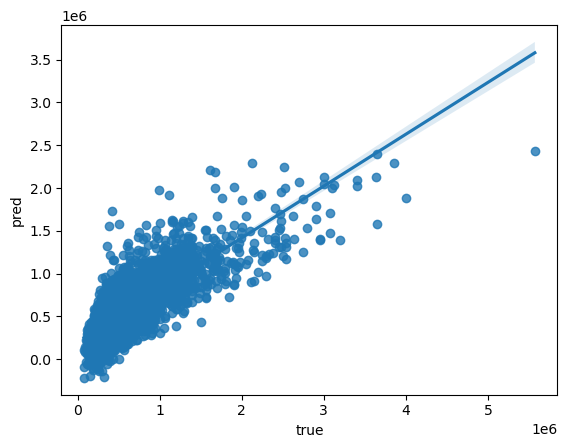

In [114]:
sns.regplot(results['true'], results['pred'])